# Introduction



Welcome to our Machine Learning project on Smoke detection using AI

## Research Questions

In [ ]:
# What are the key factors that make a smoke detector device accurate?

In [ ]:
# Can we improve the accuracy of the smoke detector device using AI / IoT?

In [ ]:
# What are the businesses that would benefit from our model results?

# Preliminary list of data-sets:


In [2]:
# Let's import the necessary libraries:

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from collections import Counter


In [89]:
from imblearn.under_sampling import RandomUnderSampler #undersampling

In [4]:
# Reading the data:

In [90]:
smoke = pd.read_csv('/Users/macintosh/Downloads/smoke_detection_iot.csv')

In [4]:
smoke

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [91]:
smoke=smoke.drop(['UTC','Unnamed: 0','CNT'],axis=1)


In [6]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [7]:
smoke.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [8]:
smoke.dtypes

Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
Fire Alarm          int64
dtype: object

In [9]:
smoke.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

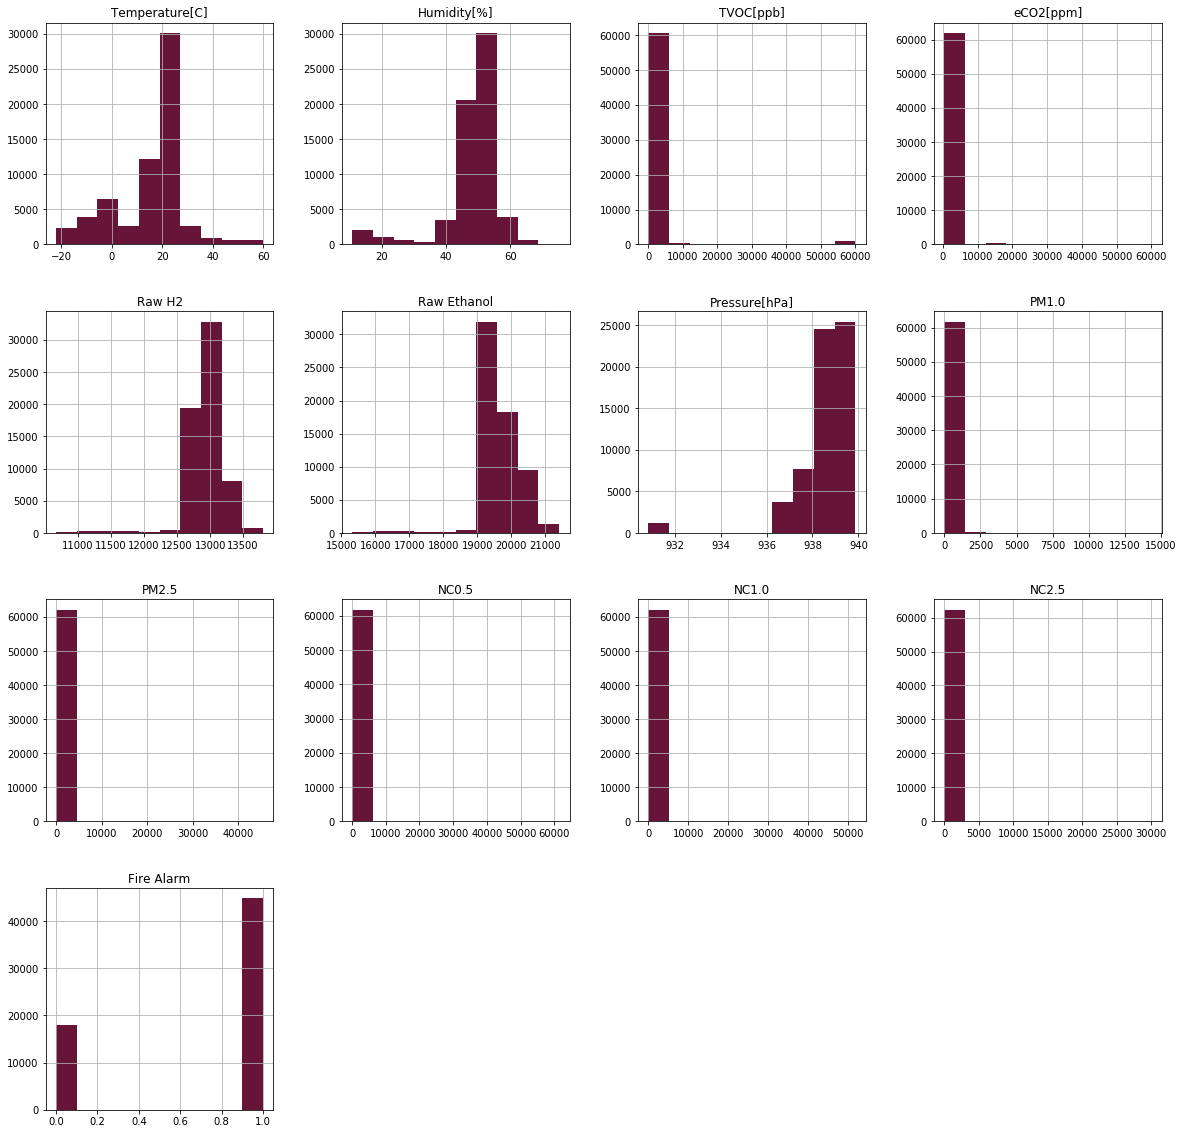

In [10]:
smoke.hist(figsize=(20,20), color='#661538')
plt.show

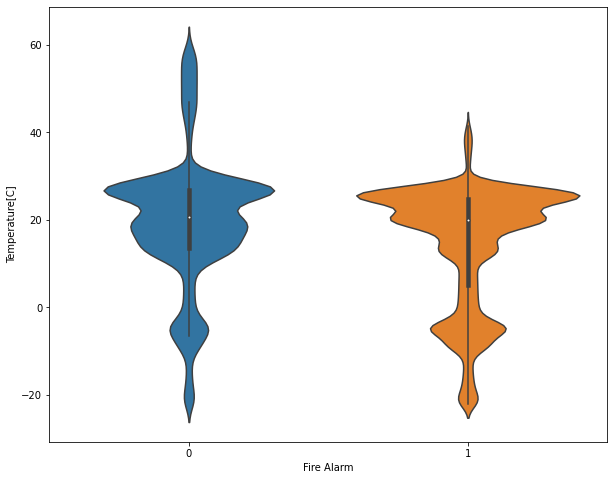

In [40]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="Fire Alarm", y="Temperature[C]", data=smoke)

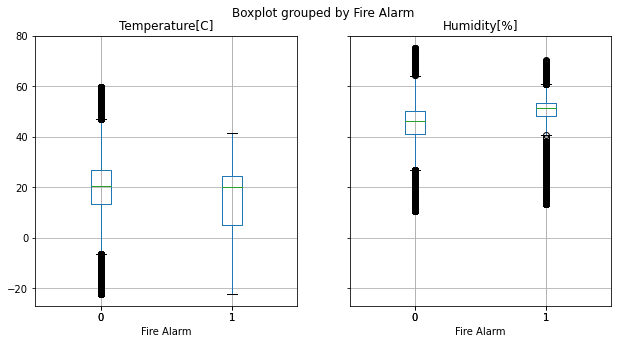

In [7]:
boxplot = smoke.boxplot(column=['Temperature[C]', 'Humidity[%]'], by = 'Fire Alarm', figsize=(10,5))


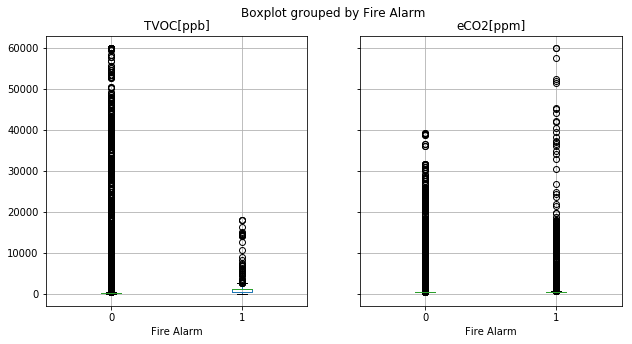

In [34]:
boxplot = smoke.boxplot(column=['TVOC[ppb]','eCO2[ppm]'], by = 'Fire Alarm', figsize=(10,5))


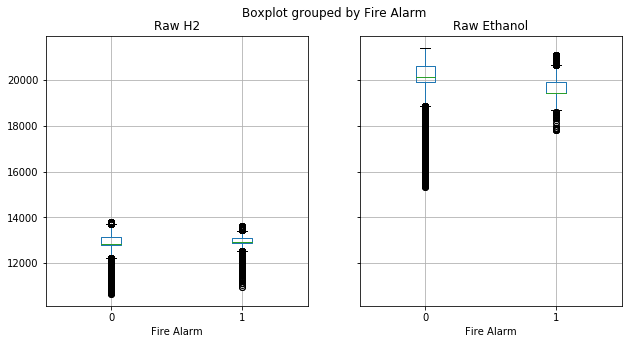

In [42]:
boxplot = smoke.boxplot(column=['Raw H2','Raw Ethanol'],by = 'Fire Alarm', figsize=(10,5))


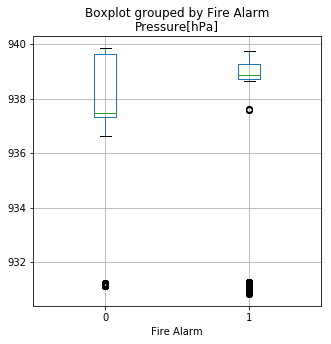

In [10]:
boxplot = smoke.boxplot(column=['Pressure[hPa]'],by = 'Fire Alarm' ,figsize=(5,5))


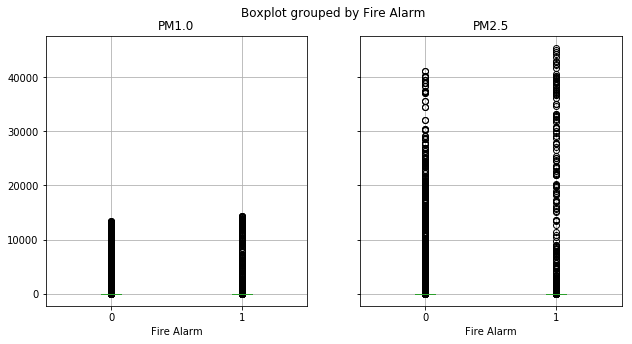

In [46]:
boxplot = smoke.boxplot(column=['PM1.0','PM2.5' ],by = 'Fire Alarm' ,figsize=(10,5))

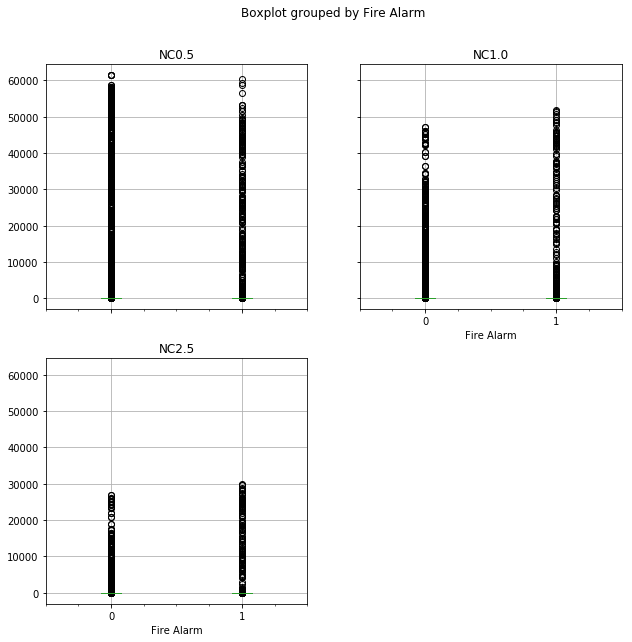

In [49]:
boxplot = smoke.boxplot(column=['NC0.5','NC1.0', 'NC2.5' ],by = 'Fire Alarm' ,figsize=(10,10))

In [10]:
# Correlation using Pandas:

In [92]:
smoke_corr = smoke.corr(method='pearson')

smoke_corr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


In [12]:
# Let's create the correlation matrix:

Text(0.5, 1.0, 'Correlation between columns')

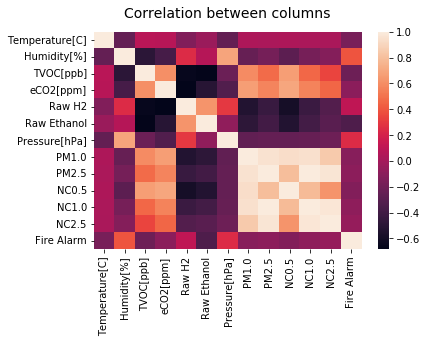

In [93]:
hm = sns.heatmap(smoke.corr())

hm.set_title('Correlation between columns', fontdict={'fontsize':14}, pad=14)

In [ ]:
# null values:

In [94]:
smoke.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [ ]:
# Great, no null values.

In [ ]:
# Let's look for outliers:

In [14]:
smoke.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [95]:
import researchpy as rp


In [96]:
rp.ttest(group1= smoke['Humidity[%]'][smoke['Fire Alarm'] == 1], group1_name= "Alarm",
         group2= smoke['Humidity[%]'][smoke['Fire Alarm'] == 0], group2_name= "NoAlarm")

(   Variable        N       Mean         SD        SE  95% Conf.   Interval
 0     Alarm  44757.0  50.779534   5.937239  0.028064  50.724527  50.834540
 1   NoAlarm  17873.0  42.930077  11.962854  0.089482  42.754683  43.105470
 2  combined  62630.0  48.539499   8.865367  0.035425  48.470067  48.608932,
                 Independent t-test     results
 0  Difference (Alarm - NoAlarm) =       7.8495
 1            Degrees of freedom =   62628.0000
 2                             t =     109.1707
 3         Two side test p value =       0.0000
 4        Difference < 0 p value =       1.0000
 5        Difference > 0 p value =       0.0000
 6                     Cohen's d =       0.9660
 7                     Hedge's g =       0.9660
 8                Glass's delta1 =       1.3221
 9              Point-Biserial r =       0.3998)

In [17]:
df = smoke

In [ ]:
#undersampling

In [97]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [98]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [99]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=600)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 50104
The number of records in the test dataset is 12526


In [100]:
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the test dataset is 12526
The training dataset has 14315 records for the majority class and 35789 records for the minority class.


In [101]:
y_test.value_counts()

1    8968
0    3558
Name: Fire Alarm, dtype: int64

In [102]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

In [103]:
X_train_rus.head(2)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.013,20.71,2662,400,12979,19949,936.834,1.21,1.26,8.32,1.298,0.029
1,39.190,38.82,9267,400,12899,19370,936.860,0.60,0.62,4.14,0.645,0.015


In [104]:
y_train_rus.head(2)

0    0
1    0
Name: Fire Alarm, dtype: int64

In [105]:
y_train_rus.value_counts()

0    14315
1    14315
Name: Fire Alarm, dtype: int64

In [106]:
df_resampled=result = pd.concat([X_train_rus, y_train_rus], axis=1)

In [107]:
df_resampled.head(3)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.013,20.71,2662,400,12979,19949,936.834,1.21,1.26,8.32,1.298,0.029,0
1,39.190,38.82,9267,400,12899,19370,936.860,0.60,0.62,4.14,0.645,0.015,0
2,20.844,42.32,179,422,12774,20540,937.359,1.80,1.87,12.41,1.935,0.044,0


In [108]:
df_resampled['Fire Alarm'].value_counts()

0    14315
1    14315
Name: Fire Alarm, dtype: int64

In [109]:
df_resampled.sample(5)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
6009,21.230,45.31,165,400,13142,20003,939.667,0.89,0.93,6.16,0.960,0.022,0
18795,18.245,46.84,1122,497,12852,19446,938.916,2.19,2.27,15.06,2.349,0.053,1
5083,25.920,48.50,178,438,12769,20539,937.446,1.23,1.28,8.47,1.320,0.030,0
27727,20.318,47.23,1138,526,12846,19453,938.897,1.83,1.90,12.56,1.959,0.044,1
20657,15.636,53.23,1151,619,12811,19448,939.040,2.11,2.19,14.49,2.260,0.051,1


In [110]:
smo = df_resampled

In [111]:
predictors = smo.columns.tolist()
predictors.remove('Fire Alarm')

In [ ]:
#Now we have re-sampled data

In [ ]:
# The modelling techniques to use:

KNN Modelling - KNN works well for datasets where we need to classify new data points based on the similiarity measure of previously stored data points / characterstics.

Random Forest - Our cleaned data is susceptible to outliers. Hence, random forest will be used to bucket the outliers and
provide accurate values. 

Linear Regression 

Logistic Regression

In [ ]:
# Let's start with Random Forest

In [230]:
X = smo.iloc[:, :-1]
y = smo.iloc[:, -1]

In [231]:
from sklearn.model_selection import train_test_split


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=420)

print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 22904
The number of records in the test dataset is 5726


In [233]:
from sklearn.ensemble import RandomForestClassifier


In [234]:
RF=RandomForestClassifier(n_estimators=100)

In [235]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [236]:
y_pred=RF.predict(X_test)

In [237]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.9994760740482012


In [238]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9994789103930896

In [239]:
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import confusion_matrix, classification_report

    

In [240]:
confusion_matrix(y_test, y_pred)

array([[2910,    2],
       [   1, 2813]])

In [241]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2912
           1       1.00      1.00      1.00      2814

    accuracy                           1.00      5726
   macro avg       1.00      1.00      1.00      5726
weighted avg       1.00      1.00      1.00      5726



In [242]:
feature_importances = RF.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

,Importance
TVOC[ppb],0.253862
Pressure[hPa],0.216187
Raw Ethanol,0.164030
Humidity[%],0.071198
Raw H2,0.064488
NC0.5,0.056537
PM2.5,0.043838
Temperature[C],0.040325
PM1.0,0.033292
NC1.0,0.030519


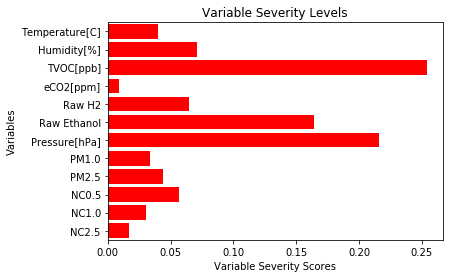

In [243]:
feature_importances_list = predictors
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

# Let's use Decision trees

In [244]:
from sklearn.tree import DecisionTreeClassifier

In [245]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000)

In [246]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1000)

In [247]:
y_predic = clf.predict(X_test)
y_predic

array([0, 0, 0, ..., 0, 0, 1])

In [248]:
print("Accuracy of this model is:", accuracy_score(y_test, y_predic))

Accuracy of this model is: 0.9996507160321342


In [249]:
sco = accuracy_score(y_test, y_predic)*100

In [250]:
print("Our model is", sco, "accurate, that is a quite high score." )

Our model is 99.96507160321342 accurate, that is a quite high score.


In [251]:
print(classification_report(y_test, y_predic))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2912
           1       1.00      1.00      1.00      2814

    accuracy                           1.00      5726
   macro avg       1.00      1.00      1.00      5726
weighted avg       1.00      1.00      1.00      5726



In [252]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import graphviz
import pydot
from IPython.display import Image, display

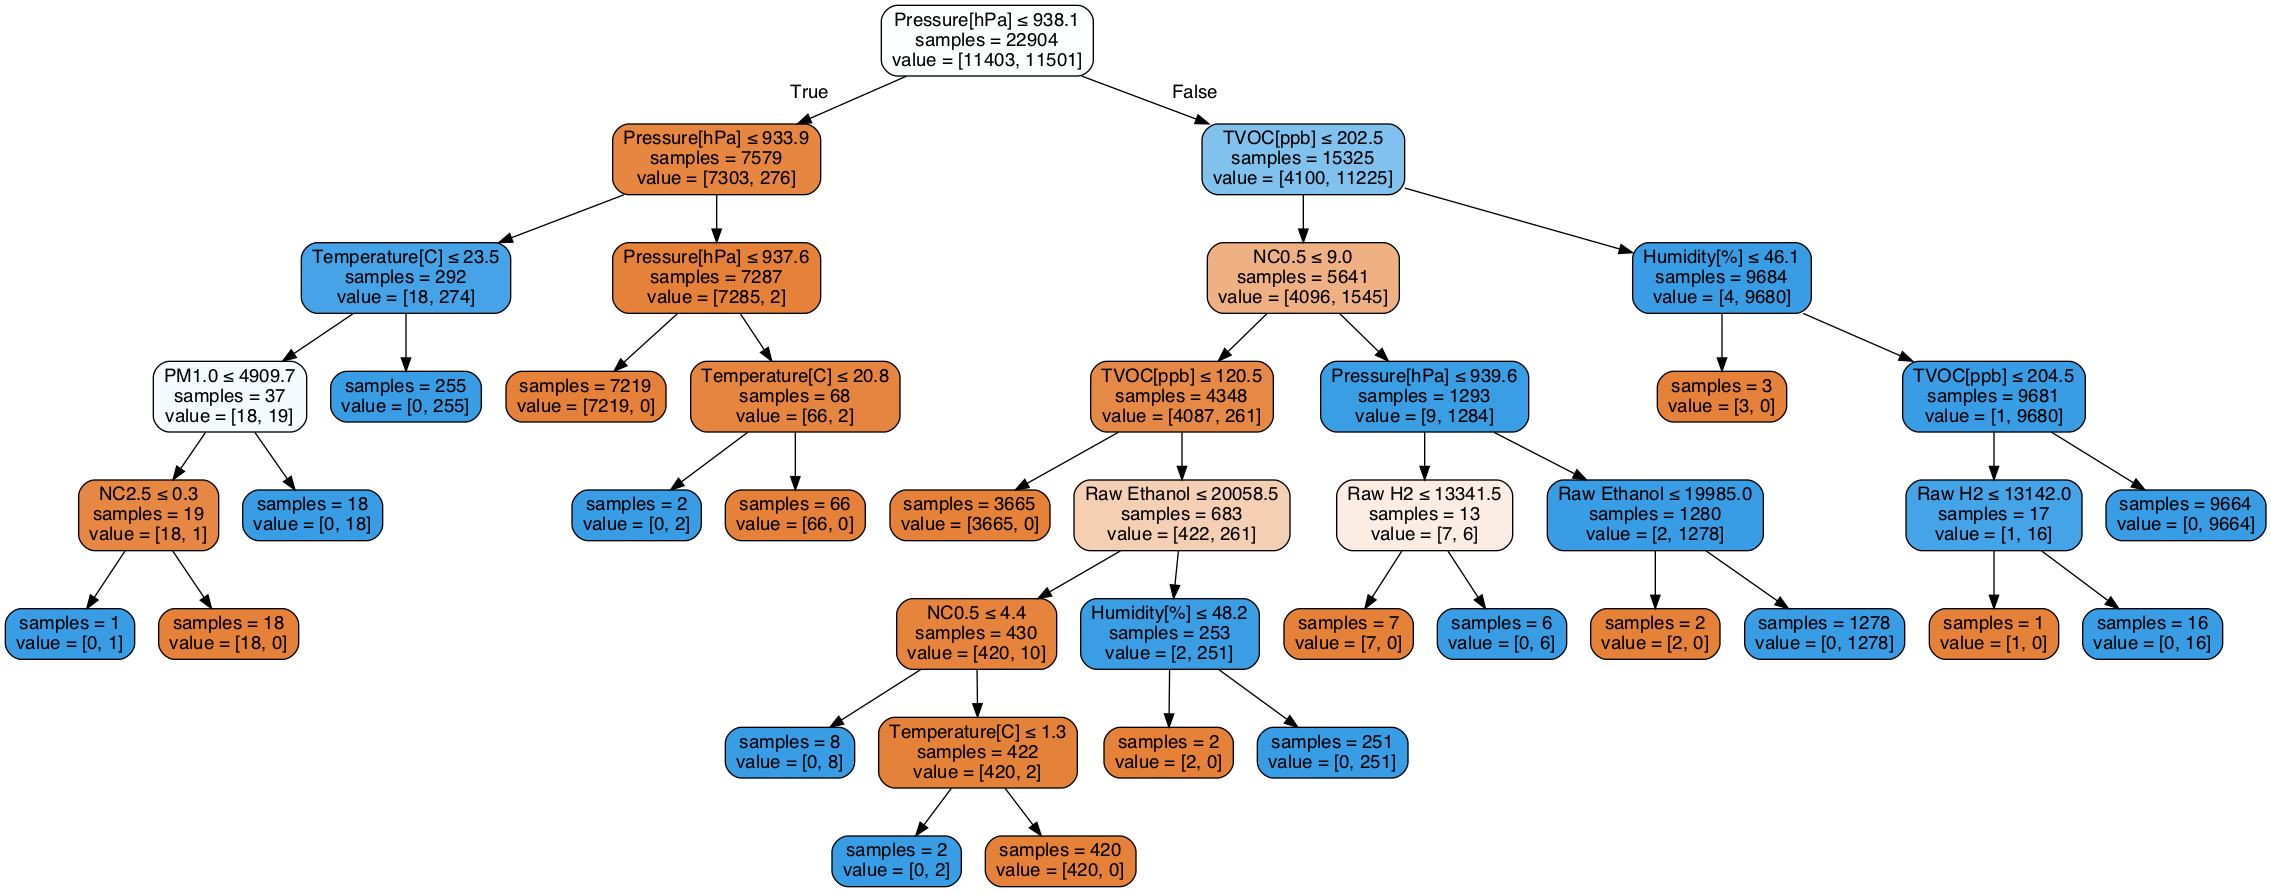

In [253]:
# Now lets plot out the regression tree use export_graphviz
dot_data = export_graphviz(clf, out_file='seat_tree.dot',feature_names=predictors,filled=True,
                           rounded=True, special_characters=True, impurity = False, precision = 1)

with open('seat_tree.dot') as f:
    dot_graph = f.read()  

# create the source object
I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
Image(I.render())

In [254]:
feature_importances = clf.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

,Importance
Pressure[hPa],0.436401
TVOC[ppb],0.383797
NC0.5,0.145235
Raw Ethanol,0.025827
Temperature[C],0.004011
Humidity[%],0.002309
PM1.0,0.001368
Raw H2,0.000805
NC2.5,0.000247
eCO2[ppm],0.000000


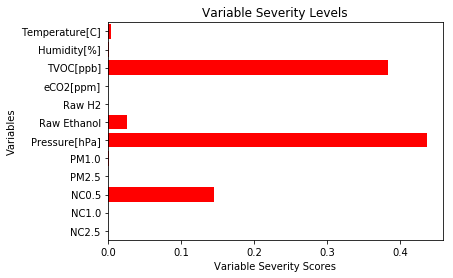

In [255]:
feature_importances_list = predictors
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

## KNN

In [213]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [214]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [215]:
y_pred=KNN.predict(X_test)

In [216]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of model: 0.9998253580160671


In [217]:
confusion_matrix(y_test, y_pred)

array([[2875,    1],
       [   0, 2850]])

In [218]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2876
           1       1.00      1.00      1.00      2850

    accuracy                           1.00      5726
   macro avg       1.00      1.00      1.00      5726
weighted avg       1.00      1.00      1.00      5726



## Logistic Regression

In [256]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [257]:
y_log_pred = log_model.predict(X_test)
y_log_pred.shape[0]

5726

In [258]:
f1_score(y_test,y_log_pred)

0.8784559207094418

In [259]:
accuracy_score(y_test,y_log_pred)

0.8779252532308767

In [260]:
precision_score(y_test,y_log_pred)

0.8600612870275791

In [261]:
recall_score(y_test,y_log_pred)

0.8976545842217484

In [262]:
print(classification_report(y_test,y_log_pred))


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2912
           1       0.86      0.90      0.88      2814

    accuracy                           0.88      5726
   macro avg       0.88      0.88      0.88      5726
weighted avg       0.88      0.88      0.88      5726



In [263]:
feature_importances = log_model.coef_[0]
pd.DataFrame(data=feature_importances, index=predictors,
             columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

,Importance
Pressure[hPa],0.115469
Humidity[%],0.019546
Raw H2,0.010619
eCO2[ppm],0.002290
PM1.0,0.000016
NC1.0,0.000006
PM2.5,0.000004
NC2.5,-0.000009
NC0.5,-0.000027
TVOC[ppb],-0.001741


In [264]:
feat_importance_log = log_model.coef_[0]

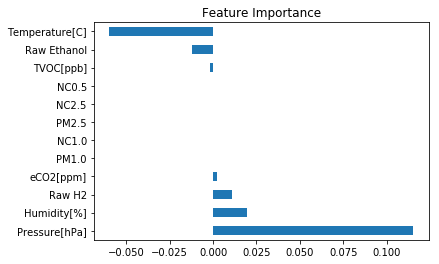

In [265]:
feat_importances_log = pd.Series(feat_importance_log,index = X_test.columns )
feat_importances_log.nlargest(20).plot(kind='barh',title = 'Feature Importance')

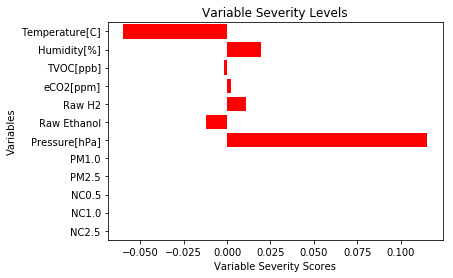

In [266]:
feature_importances_list = predictors
sns.barplot(x = feature_importances, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

### Gaussian Naive Bayes

In [267]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           0       0.92      0.25      0.40      2912
           1       0.56      0.98      0.71      2814

    accuracy                           0.61      5726
   macro avg       0.74      0.61      0.55      5726
weighted avg       0.74      0.61      0.55      5726



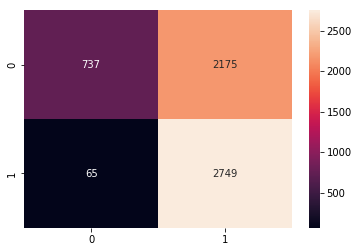

In [268]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gnb)
f = sns.heatmap(cm, annot=True, fmt='d')

In [274]:
from sklearn.inspection import permutation_importance

feature_importances = permutation_importance(gnb, X_test, y_test)
pd.DataFrame(data=feature_importances.importances_mean, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)

,Importance
Raw Ethanol,0.027838
TVOC[ppb],0.023158
Humidity[%],0.008697
Pressure[hPa],0.003248
NC0.5,0.000733
PM1.0,0.000524
eCO2[ppm],0.000419
Temperature[C],0.000349
NC1.0,0.000210
PM2.5,0.000070


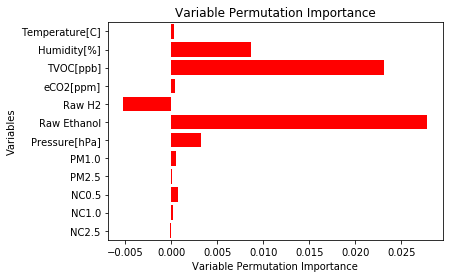

In [276]:
feature_importances_list = predictors
sns.barplot(x = feature_importances.importances_mean, y = feature_importances_list, color='r', saturation=1)
plt.xlabel('Variable Permutation Importance')
plt.ylabel('Variables')
plt.title('Variable Permutation Importance')
plt.show()

## Voting

In [226]:
from sklearn.ensemble import  VotingClassifier 
Classifier = VotingClassifier(estimators=[
('DT', clf), ('RF', RF),('LogReg',log_model),('KNN',KNN),("GNB",gnb)],voting='soft',flatten_transform=True) 
eclf1 = Classifier.fit(X_train , y_train)
print(Classifier.score(X_test,y_test))

1.0


In [227]:
y_pred=Classifier.predict(X_test)

In [228]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2876
           1       1.00      1.00      1.00      2850

    accuracy                           1.00      5726
   macro avg       1.00      1.00      1.00      5726
weighted avg       1.00      1.00      1.00      5726



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



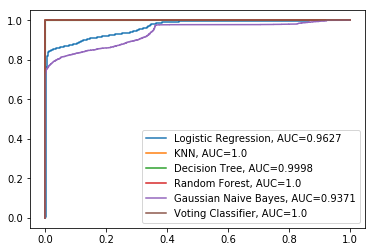

In [229]:
np.random.seed(42)

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit KNN model and plot ROC curve
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000, max_depth =8)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit Gaussian Naive Bayes model and plot ROC curve
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gaussian Naive Bayes, AUC="+str(auc))

#fit Voting Classifier model and plot ROC curve
model = VotingClassifier(estimators=[
('DT', clf), ('RF', RF),('LogReg',log_model),('KNN',KNN), ("GNB",gnb)],voting='soft',flatten_transform=True) 
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Voting Classifier, AUC="+str(auc))

#add legend
plt.legend()